# Student Performance Analytics

## Objective
Analyze student academic performance and identify key factors that influence
pass/fail outcomes using data analytics and machine learning.


In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [23]:
# Load Dataset
df=pd.read_csv(r"C:\Users\kumar\student-performance-analytics\data\raw\student-mat.csv")
# Display first few rows of the dataset
(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [24]:
# basic inspection
df.shape
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [25]:
# CREATE TARGET VARIABLE (pass/fail)
df[['G1', 'G2', 'G3']].describe()
df['Pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
df['Pass'].value_counts()
df['Pass'].value_counts(normalize=True) * 100




Pass
1    84.59168
0    15.40832
Name: proportion, dtype: float64

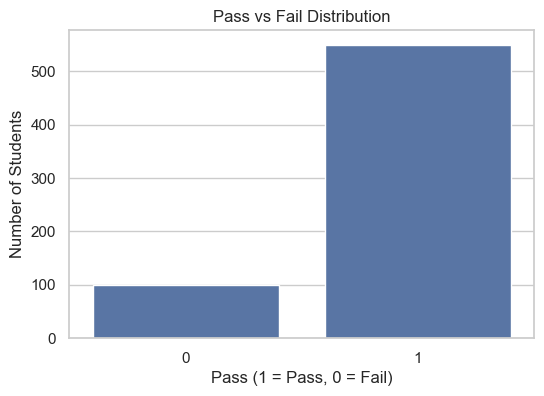

In [26]:
#visualize Pass vs Fail
plt.figure(figsize=(6,4))
sns.countplot(x='Pass', data=df)
plt.title("Pass vs Fail Distribution")
plt.xlabel("Pass (1 = Pass, 0 = Fail)")
plt.ylabel("Number of Students")
plt.show()


### Target Variable: Pass / Fail

A binary target variable was created using the final grade (G3).
Students with a final grade of 10 or above were labeled as Pass,
while those below 10 were labeled as Fail.


 # EXPLORATORY DATA ANALYSIS 

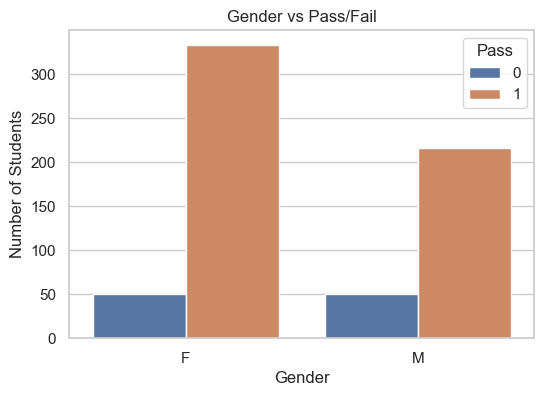

In [27]:

# Gender vs Performance
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='Pass', data=df)
plt.title("Gender vs Pass/Fail")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()



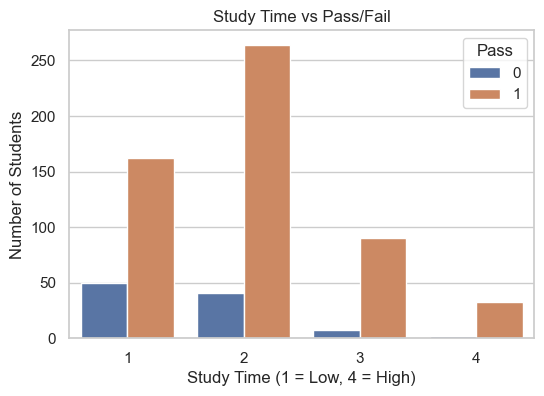

In [28]:
#STUDYTIME vs Performance
plt.figure(figsize=(6,4))
sns.countplot(x='studytime', hue='Pass', data=df)
plt.title("Study Time vs Pass/Fail")
plt.xlabel("Study Time (1 = Low, 4 = High)")
plt.ylabel("Number of Students")
plt.show()


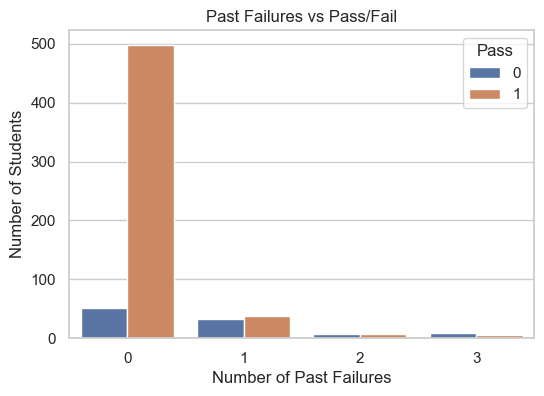

In [29]:
#Failure vs performance     
plt.figure(figsize=(6,4))
sns.countplot(x='failures', hue='Pass', data=df)
plt.title("Past Failures vs Pass/Fail")
plt.xlabel("Number of Past Failures")
plt.ylabel("Number of Students")
plt.show()


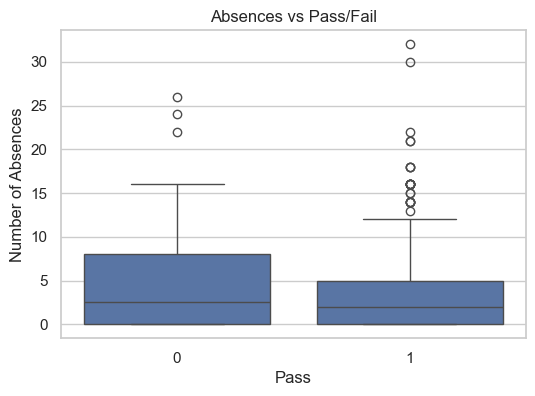

In [30]:
#Absences vs Performance
plt.figure(figsize=(6,4))
sns.boxplot(x='Pass', y='absences', data=df)
plt.title("Absences vs Pass/Fail")
plt.xlabel("Pass")
plt.ylabel("Number of Absences")
plt.show()


### Key Factors Affecting Student Performance

Exploratory analysis shows that academic performance is influenced by several factors.
Students with higher study time tend to perform better, while those with previous
academic failures are at significantly higher risk of failing again. Higher absenteeism
is also associated with poorer performance.


# FEATURE SELECTION & ENCODING

In [31]:
# Select Important Features
features = [
    'sex', 'age', 'studytime', 'failures',
    'schoolsup', 'famsup',
    'paid', 'activities',
    'higher', 'internet',
    'absences'
]

X = df[features]
y = df['Pass']


In [32]:
# Encode Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()
X_encoded.shape

(649, 11)

### Feature Selection & Encoding

Relevant academic, demographic, and behavioral features were selected for modeling.
Categorical variables were converted into numerical form using one-hot encoding.
Grade-related features were excluded to prevent data leakage.


# MODEL BUILDING – LOGISTIC REGRESSION

In [33]:
# Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [34]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [35]:
# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [36]:
# Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.823076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.15      0.21        20
           1       0.86      0.95      0.90       110

    accuracy                           0.82       130
   macro avg       0.60      0.55      0.55       130
weighted avg       0.78      0.82      0.79       130


Confusion Matrix:
 [[  3  17]
 [  6 104]]


### Model Performance

A Logistic Regression model was trained to predict student pass/fail outcomes.
The model achieved reasonable accuracy, indicating that academic and behavioral
features can effectively explain student performance.


In [37]:
import joblib

joblib.dump(model, "../model/student_pass_model.pkl")
joblib.dump(X_encoded.columns.tolist(), "../model/feature_columns.pkl")

print("Model and feature columns saved successfully!")


Model and feature columns saved successfully!
